In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.mpl_style = 'default'

In [3]:
df_flights = pd.read_csv('Flight_Departures_July.csv')
df_flights = df_flights.drop(['TAXI_OUT', 'WHEELS_OFF', 'CANCELLATION_CODE', 'Unnamed: 20'], axis=1)
df_flights.head(5)

,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,2015-07-06,AA,BOS,"Boston, MA",ORD,"Chicago, IL",1930,2131,121,0,867,0,0,95,0,18
1,1,2015-07-13,AA,BOS,"Boston, MA",ORD,"Chicago, IL",1930,2003,33,0,867,0,0,29,0,0
2,1,2015-07-20,AA,BOS,"Boston, MA",ORD,"Chicago, IL",1930,1925,-5,0,867,NaN,NaN,NaN,NaN,NaN
3,1,2015-07-27,AA,BOS,"Boston, MA",ORD,"Chicago, IL",1930,1938,8,0,867,NaN,NaN,NaN,NaN,NaN
4,1,2015-07-06,AA,ORD,"Chicago, IL",SEA,"Seattle, WA",1706,1703,-3,0,1721,0,0,17,0,0


In [4]:
df_flights.columns.values

array(['DAY_OF_WEEK', 'FL_DATE', 'UNIQUE_CARRIER', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'CANCELLED', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY'], dtype=object)

In [5]:
df_flights[['CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY']] = df_flights[['CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY',
       'LATE_AIRCRAFT_DELAY']].fillna(0)
df_flights.head(5)

,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,2015-07-06,AA,BOS,"Boston, MA",ORD,"Chicago, IL",1930,2131,121,0,867,0,0,95,0,18
1,1,2015-07-13,AA,BOS,"Boston, MA",ORD,"Chicago, IL",1930,2003,33,0,867,0,0,29,0,0
2,1,2015-07-20,AA,BOS,"Boston, MA",ORD,"Chicago, IL",1930,1925,-5,0,867,0,0,0,0,0
3,1,2015-07-27,AA,BOS,"Boston, MA",ORD,"Chicago, IL",1930,1938,8,0,867,0,0,0,0,0
4,1,2015-07-06,AA,ORD,"Chicago, IL",SEA,"Seattle, WA",1706,1703,-3,0,1721,0,0,17,0,0


In [6]:
df_ord = df_flights[df_flights.ORIGIN == 'ORD']
df_ord = df_ord.sort('FL_DATE')
df_ord = df_ord.reset_index(drop=True)
df_ord.head(5)

,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,3,2015-07-01,EV,ORD,"Chicago, IL",CWA,"Mosinee, WI",1405,1400,-5,0,212,0,0,0,0,0
1,3,2015-07-01,OO,ORD,"Chicago, IL",SLC,"Salt Lake City, UT",800,755,-5,0,1250,0,0,0,0,0
2,3,2015-07-01,EV,ORD,"Chicago, IL",FNT,"Flint, MI",745,743,-2,0,223,0,0,0,0,0
3,3,2015-07-01,EV,ORD,"Chicago, IL",LEX,"Lexington, KY",2058,2053,-5,0,323,0,0,0,0,0
4,3,2015-07-01,DL,ORD,"Chicago, IL",ATL,"Atlanta, GA",1655,1757,62,0,606,62,0,23,0,0


###Count the number of delayed flights out of O'hare airport in July 2015

In [7]:
s_delays = df_ord[df_ord.DEP_DELAY > 0].groupby('UNIQUE_CARRIER').size()
print("Number of delays for each airine:\n", s_delays)
print("\nTotal delayed departures out of ORD in July:", sum(s_delays))

Number of delays for each airine:
 UNIQUE_CARRIER
AA    2412
AS      49
B6     119
DL     316
EV    1645
F9     251
MQ    2173
NK     644
OO    1539
UA    3767
VX      89
dtype: int64

Total delayed departures out of ORD in July: 13004


###Find some trends in the data:

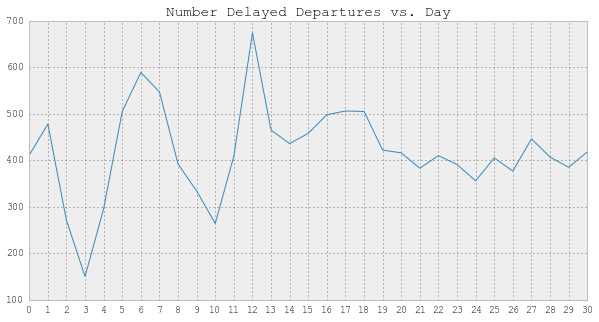

In [8]:
df_delays = df_ord[df_ord.DEP_DELAY > 0]
s_delays = df_delays.groupby('FL_DATE').size()

axes = s_delays.plot(title='Number Delayed Departures vs. Day', figsize=(10,5), xticks=list(range(31)), use_index=False)
axes.tick_params(axis='x', colors='black')
axes.tick_params(axis='y', colors='black')

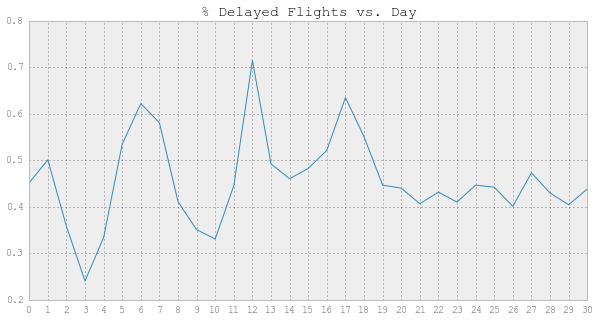

In [9]:
s_flights = df_ord.groupby('FL_DATE').size()
s_delays_pct = s_delays/s_flights
s_delays_pct.plot(title='% Delayed Flights vs. Day', figsize=(10,5), xticks=list(range(31)), use_index=False)

###Show some bar graphs from the data

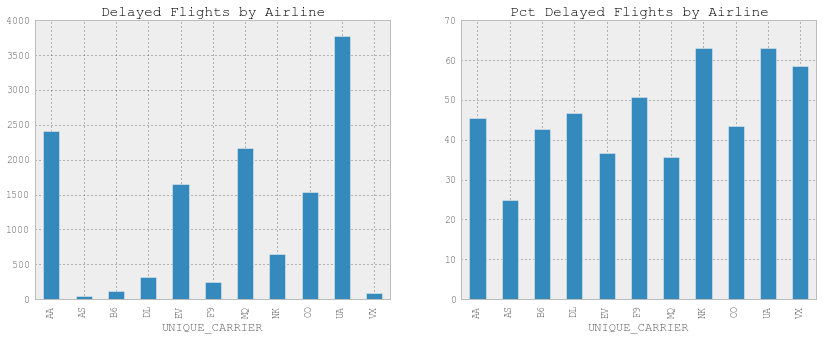

In [10]:
s_airlines_del = df_ord[df_ord.DEP_DELAY > 0].groupby('UNIQUE_CARRIER').size()
s_airlines = df_ord.groupby('UNIQUE_CARRIER').size()
s_airlines_del_pct = (s_airlines_del/s_airlines)*100
plt.subplot(1,2,1)
s_airlines_del.plot(title="Delayed Flights by Airline", figsize=(14,5), kind='bar')
plt.subplot(1,2,2)
s_airlines_del_pct.plot(title="Pct Delayed Flights by Airline", figsize=(14,5), kind='bar')

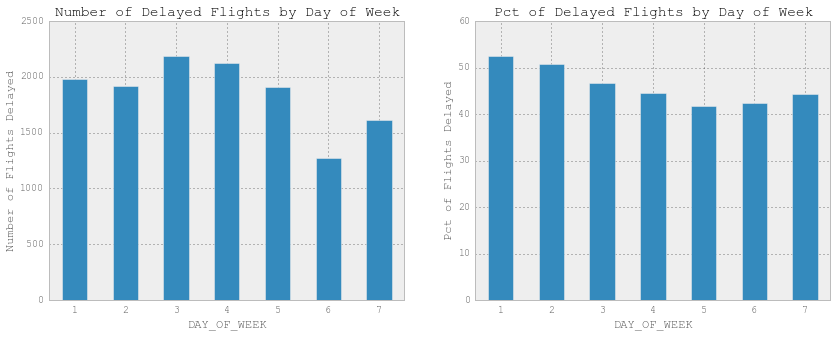

In [11]:
s_days_del = df_ord[df_ord.DEP_DELAY > 0].groupby('DAY_OF_WEEK').size()
s_days = df_ord.groupby('DAY_OF_WEEK').size()
s_days_del_pct = (s_days_del/s_days)*100
plt.subplot(1,2,1)
ax1 = s_days_del.plot(title='Number of Delayed Flights by Day of Week', kind='bar', figsize=(14,5), rot=0)
ax1.set_ylabel('Number of Flights Delayed')
plt.subplot(1,2,2)
ax2 = s_days_del_pct.plot(title='Pct of Delayed Flights by Day of Week', kind='bar', figsize=(14,5), rot=0)
ax2.set_ylabel('Pct of Flights Delayed')

In [80]:
df_ord_del = df_ord[df_ord.DEP_DELAY > 0]
df_ord_del['M_DAY'] = df_ord_del['FL_DATE'].str[-2:].astype(int)
df_ord_del.head(5)

C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,CANCELLED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,M_DAY
4,3,2015-07-01,DL,ORD,"Chicago, IL",ATL,"Atlanta, GA",1655,1757,62,0,606,62,0,23,0,0,1
12,3,2015-07-01,DL,ORD,"Chicago, IL",MSP,"Minneapolis, MN",1928,1930,2,0,334,0,0,0,0,0,1
15,3,2015-07-01,OO,ORD,"Chicago, IL",ATL,"Atlanta, GA",1735,1804,29,0,606,24,0,34,0,5,1
20,3,2015-07-01,OO,ORD,"Chicago, IL",MKE,"Milwaukee, WI",1710,1720,10,0,67,0,0,0,0,0,1
24,3,2015-07-01,OO,ORD,"Chicago, IL",ICT,"Wichita, KS",1324,1326,2,0,588,0,0,0,0,0,1


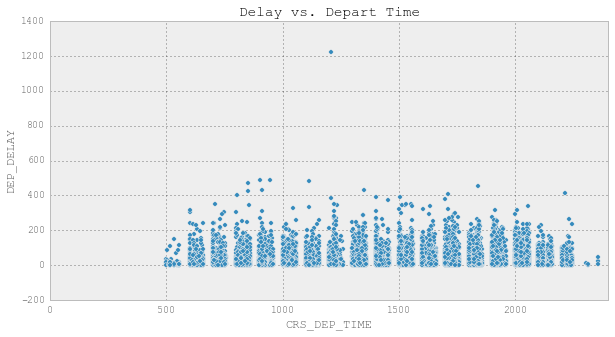

In [74]:
ax3 = df_ord_del.plot(kind='scatter', x='CRS_DEP_TIME', y='DEP_DELAY', figsize=(10, 5), title='Delay vs. Depart Time', xlim=(0,2400))